In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Entries')

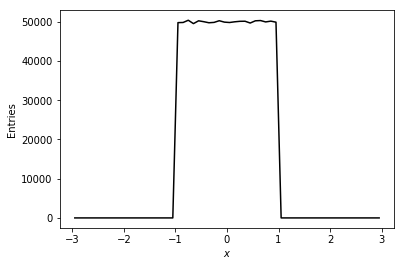

In [2]:
NEXP  = 1000000
NBINS = 60
MAX   = 3
r = np.random.uniform(low=-1.0, high=1.0, size=NEXP)
h,edges = np.histogram(r,bins=NBINS,range=(-MAX,MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins,h,"k-")
plt.xlabel("$x$")
plt.ylabel("Entries")

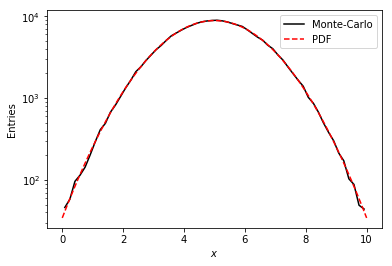

In [3]:
from scipy import stats
NEXP  = 200000
NBINS = 60
MIN   = 0
MAX   = 10
MEAN  = 5.0
SIGMA = 1.5
r = np.random.normal(loc=5.0,scale=1.5,size=NEXP)
h,edges = np.histogram(r,bins=NBINS,range=(MIN,MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins,h,"k-",label="Monte-Carlo")
binsize = float(MAX-MIN)/NBINS
x = np.linspace(MIN,MAX,100)
y = NEXP*binsize*stats.norm.pdf(x,loc=MEAN,scale=SIGMA)
plt.plot(x,y,"r--",label="PDF")
plt.xlabel("$x$")
plt.ylabel("Entries")
plt.semilogy()
plt.legend()

In [4]:
from scipy.stats import norm

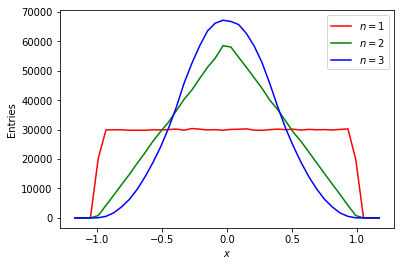

In [5]:
NEXP  = 1000000
NBINS = 40
MAX   = 1.2

r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,1))
xa = np.sum(r, axis=1)/float(1)  
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,2))
xb = np.sum(r, axis=1)/float(2)  
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,3))
xc = np.sum(r, axis=1)/float(3)  
ha,edges = np.histogram(xa,bins=NBINS,range=(-MAX,MAX))
hb,edges = np.histogram(xb,bins=NBINS,range=(-MAX,MAX))
hc,edges = np.histogram(xc,bins=NBINS,range=(-MAX,MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins,ha,"r-",label="$n=1$")
plt.plot(cbins,hb,"g-",label="$n=2$")
plt.plot(cbins,hc,"b-",label="$n=3$")
plt.xlabel("$x$")
plt.ylabel("Entries")
plt.legend()

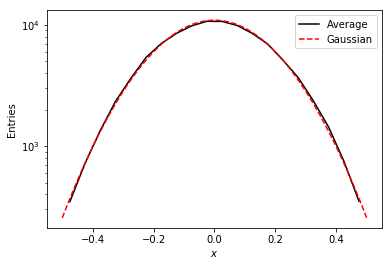

In [6]:
NEXP  = 100000
NBINS = 20
MAX   = 0.5

NAVG  = 10
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,NAVG))
x = np.sum(r, axis=1)/float(NAVG)  

h,edges = np.histogram(x,bins=NBINS,range=(-MAX,MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins,h,"k-",label="Average")
plt.semilogy()
plt.xlabel("$x$")
plt.ylabel("Entries")

mean = np.mean(x)
sig  = np.var(x)**0.5

binsize = float(2*MAX)/NBINS
x = np.linspace(-MAX,MAX,100)
y = NEXP*binsize*stats.norm.pdf(x,loc=mean,scale=sig)
plt.plot(x,y,"r--",label="Gaussian")

plt.legend()

mean:    499.99135055590733
sigma:   9.086616544477554


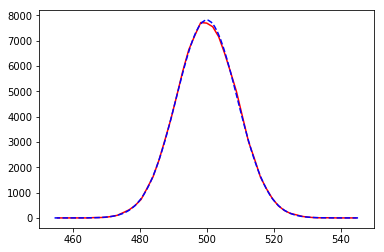

In [7]:
from scipy.stats import norm
nexp = 100000
nvar = 1000
r = np.random.uniform(size=(nexp,nvar))
x = np.sum(r, axis=1)
mean = np.mean(x)
sigma = (np.var(x))**0.5
print("mean:   ", mean)
print("sigma:  ", sigma)
a = mean - 5*sigma
b = mean + 5*sigma
nbins = 51
counts,bines = np.histogram(x,bins=nbins,range=(a,b))
binc = (bines[:-1] + bines[1:])/2.0
plt.plot(binc, counts,"r-")
binwidth = (b-a)/nbins
x = np.linspace(a,b,100)
y = binwidth*nexp*norm.pdf(x, loc=mean, scale=sigma) 
plt.plot(x,y,"b--")

sigma:            2.23686454585398
factional unc:    0.1863906960496835
For +,-, expected sigma:   2.23606797749979
For *,%, expected fractional:   0.42474482135195735


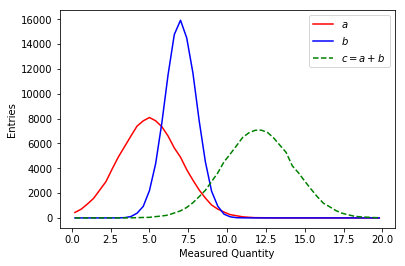

In [10]:
max = 20.0
nbins = 50

a  = 5
da = 2.0
b  = 7
db = 1.0

A = np.random.normal(size=100000, loc=a,scale=da)
B = np.random.normal(size=100000, loc=b,scale=db)
C = A + B
ca,bines = np.histogram(A,bins=nbins,range=(0,max))
cb,bines = np.histogram(B,bins=nbins,range=(0,max))
cc,bines = np.histogram(C,bins=nbins,range=(0,max))
cbins = (bines[1:] + bines[:-1])/2.0

plt.plot(cbins,ca,"r-",label="$a$")
plt.plot(cbins,cb,"b-",label="$b$")
plt.plot(cbins,cc,"g--",label="$c=a+b$")
plt.legend()

sig = np.var(C) ** 0.5
frc = sig/np.mean(C)
fa  = da/a
fb  = db/b
exp_pm = (da*da + db*db) ** 0.5
exp_md = (fa*fa + fb*fb) ** 0.5
print("sigma:           ", sig)
print("factional unc:   ", frc)
print("For +,-, expected sigma:  ",exp_pm)
print("For *,%, expected fractional:  ",exp_md)
plt.xlabel("Measured Quantity")
plt.ylabel("Entries")
plt.savefig("addunc.pdf")
